In [2]:
import pandas as pd   
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve 
from sklearn.impute import SimpleImputer, KNNImputer 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.feature_selection import SelectKBest


from catboost import CatBoostClassifier 
from xgboost import XGBClassifier 


import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 


In [14]:
df = pd.read_csv("fraud_oracle.csv")
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [15]:
df.tail(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15410,Nov,3,Sunday,Dodge,Urban,Tuesday,Nov,4,Female,Single,...,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Collision
15411,Nov,4,Tuesday,Honda,Rural,Wednesday,Nov,5,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils
15412,Nov,4,Tuesday,Pontiac,Urban,Wednesday,Nov,4,Female,Single,...,5 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Liability
15413,Nov,4,Thursday,Mazda,Urban,Monday,Nov,4,Male,Married,...,7 years,36 to 40,Yes,No,External,1 to 2,no change,1 vehicle,1996,Liability
15414,Nov,4,Friday,Chevrolet,Urban,Monday,Nov,4,Male,Single,...,7 years,51 to 65,No,No,External,1 to 2,4 to 8 years,2 vehicles,1996,Collision
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [12]:
for col in df.columns:
    print (df[col].value_counts())
    print("==============================")

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekCla

In [10]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


### Data Preprocessing and Analysis

In [28]:
obj_cols = df.select_dtypes("object")

def encode(data):
    for new_cols in data:
        leb = LabelEncoder()
        leb.fit_transform(new_cols[data])
    return data 

<AxesSubplot: xlabel='BasePolicy', ylabel='count'>

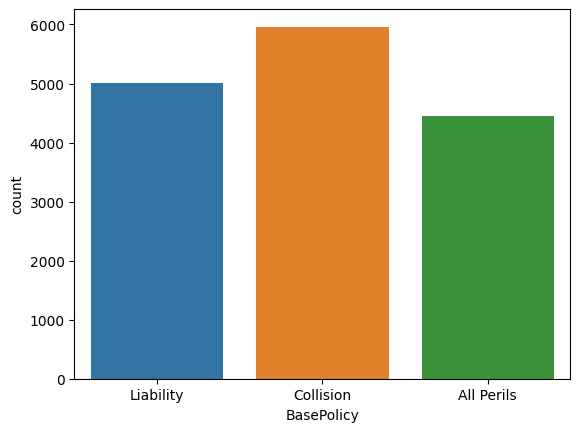

In [30]:
sns.countplot(data=df, x="BasePolicy")

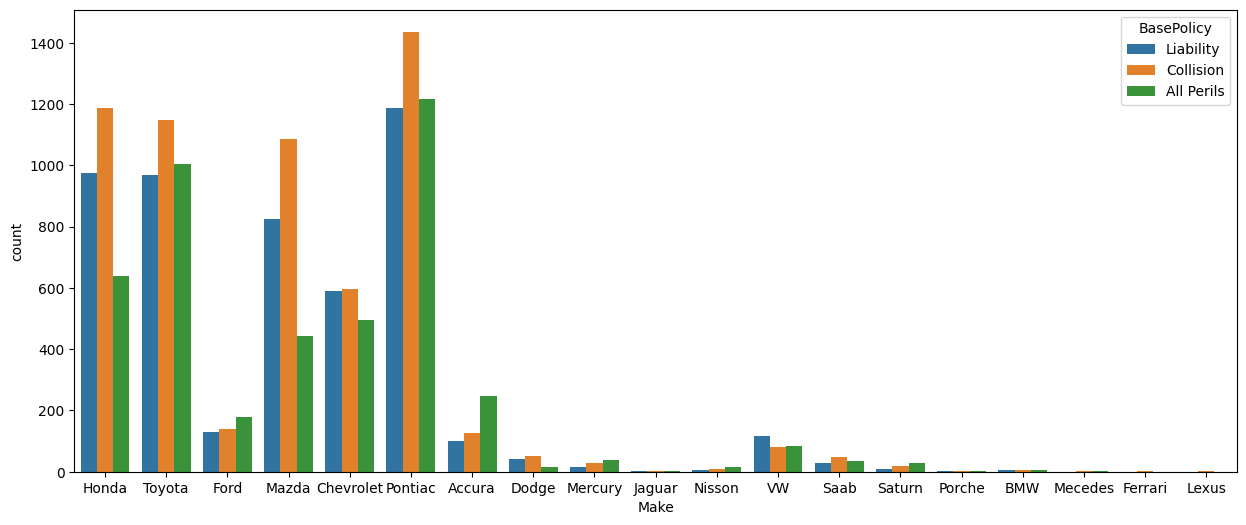

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Make", hue="BasePolicy")
plt.show()

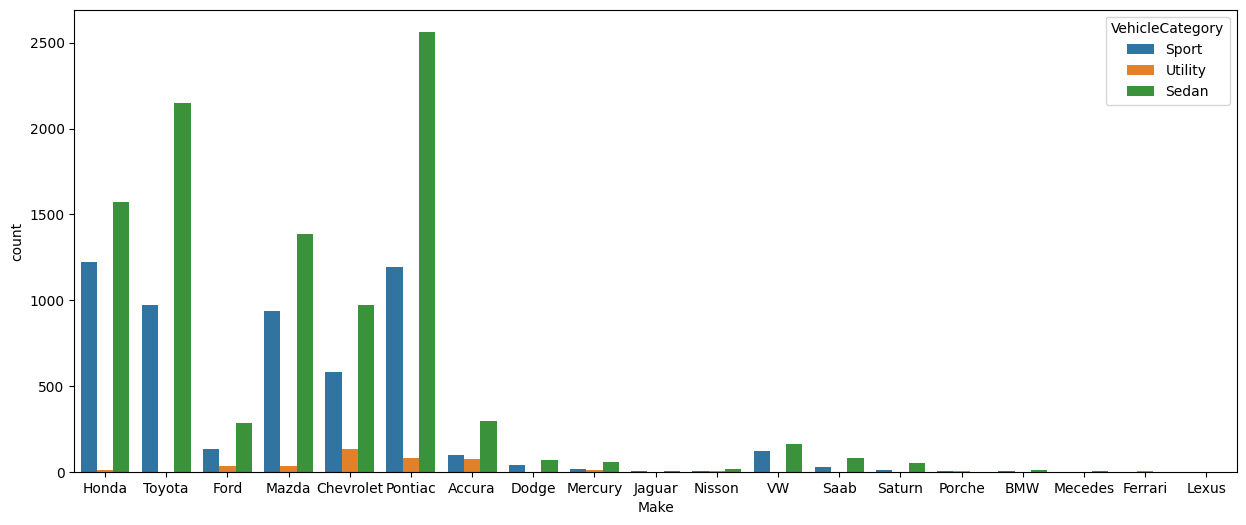

In [33]:
 
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Make", hue="VehicleCategory")
plt.show()

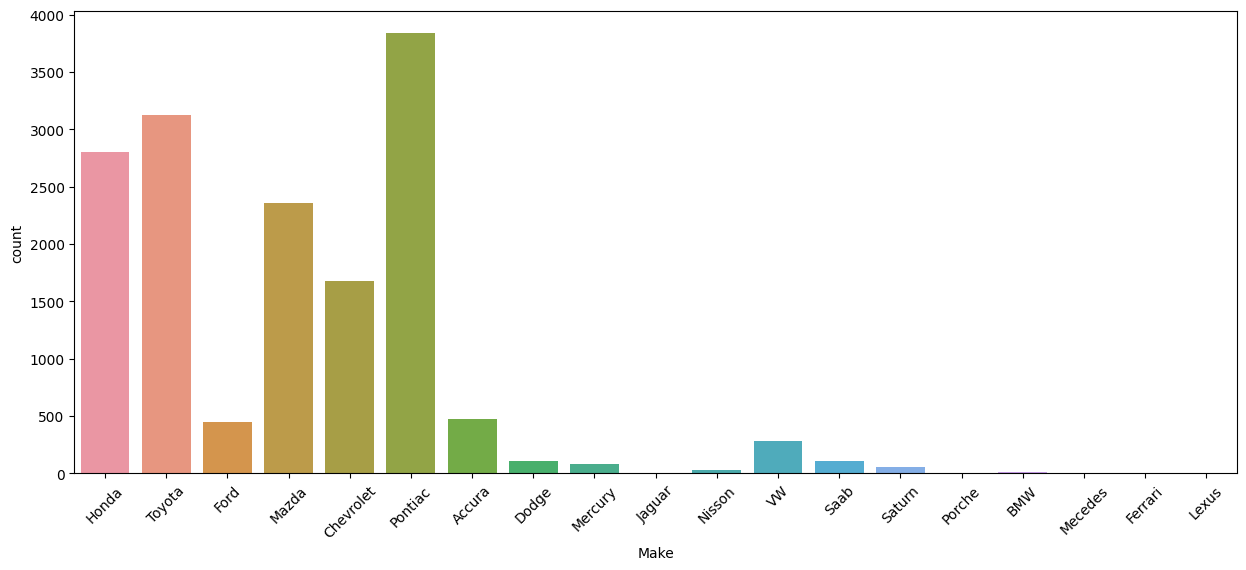

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="Make")
plt.xticks(rotation=45)
plt.show()

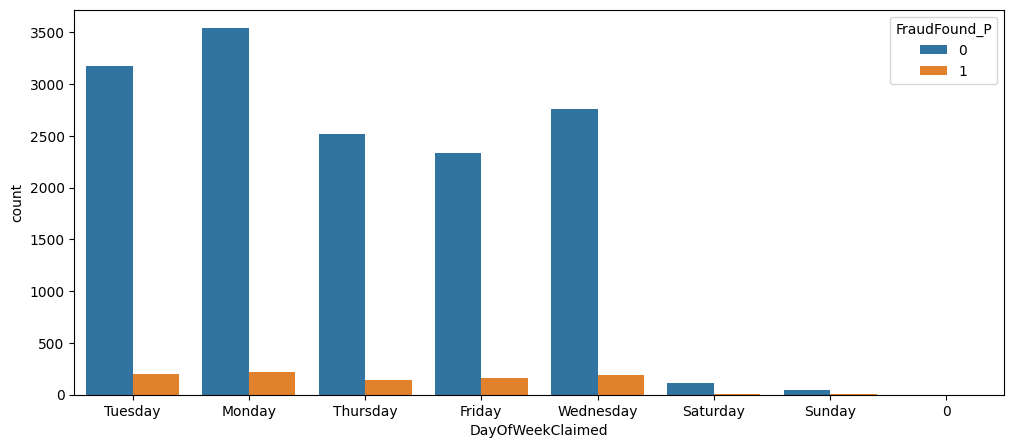

In [35]:
 
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="DayOfWeekClaimed", hue="FraudFound_P")
plt.show()

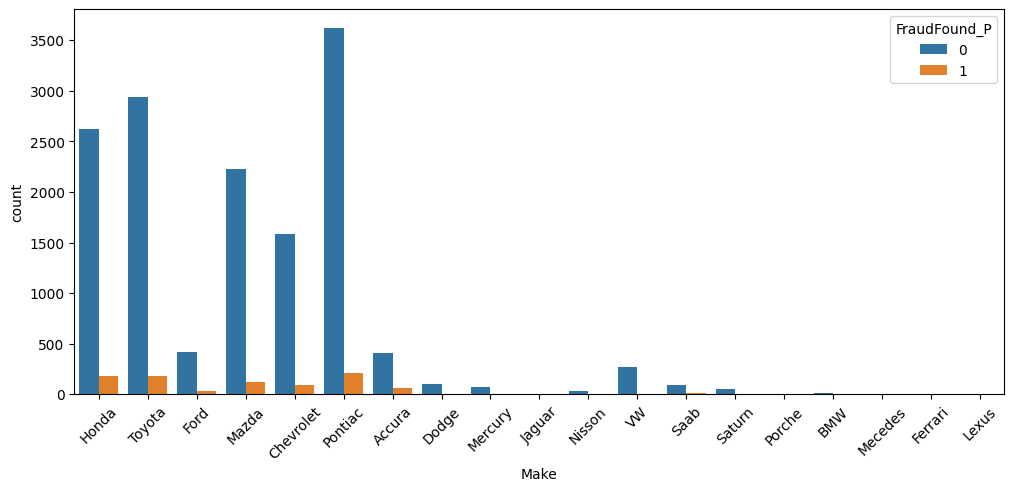

In [37]:
 
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="Make", hue="FraudFound_P")
plt.xticks(rotation=45)
plt.show()

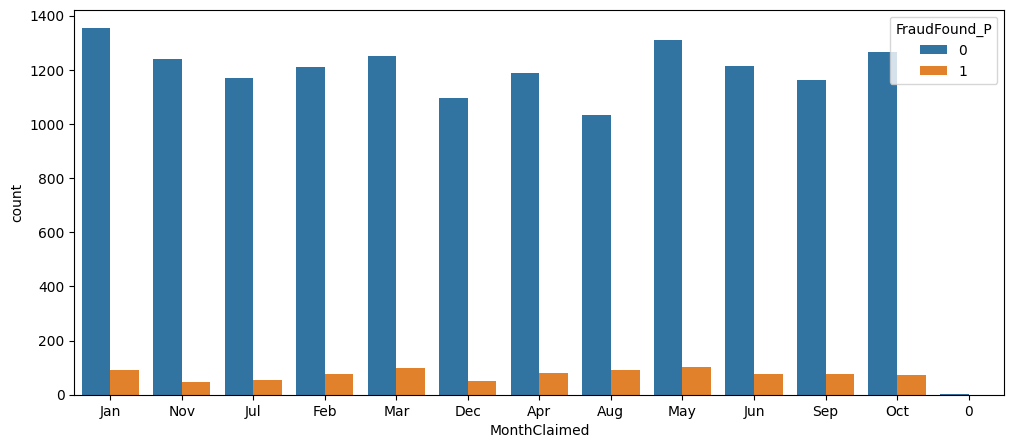

In [38]:
 
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="MonthClaimed", hue="FraudFound_P")
plt.show()

In [43]:
# Plot the average transactions per month 
group_5 = df.groupby("Sex")['FraudFound_P'].value_counts()
group_5 

Sex     FraudFound_P
Female  0                2315
        1                 105
Male    0               12182
        1                 818
Name: FraudFound_P, dtype: int64

In [59]:
# Plot the average transactions per month 
group_6 = df.groupby("Make")['FraudFound_P'].value_counts()
group_6 

Make       FraudFound_P
Accura     0                413
           1                 59
BMW        0                 14
           1                  1
Chevrolet  0               1587
           1                 94
Dodge      0                107
           1                  2
Ferrari    0                  2
Ford       0                417
           1                 33
Honda      0               2622
           1                179
Jaguar     0                  6
Lexus      0                  1
Mazda      0               2231
           1                123
Mecedes    0                  3
           1                  1
Mercury    0                 77
           1                  6
Nisson     0                 29
           1                  1
Pontiac    0               3624
           1                213
Porche     0                  5
Saab       0                 97
           1                 11
Saturn     0                 52
           1                  6
Toyota     0    

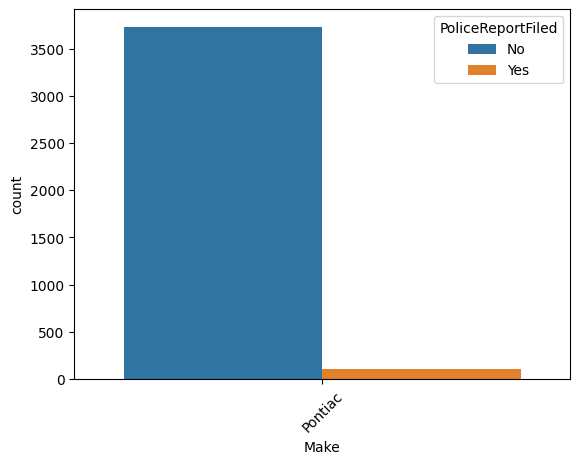

In [60]:
make = df[df['Make'] == "Pontiac"]
sns.countplot(data=make, x= "Make", hue="PoliceReportFiled")
plt.xticks(rotation=45)
plt.show()

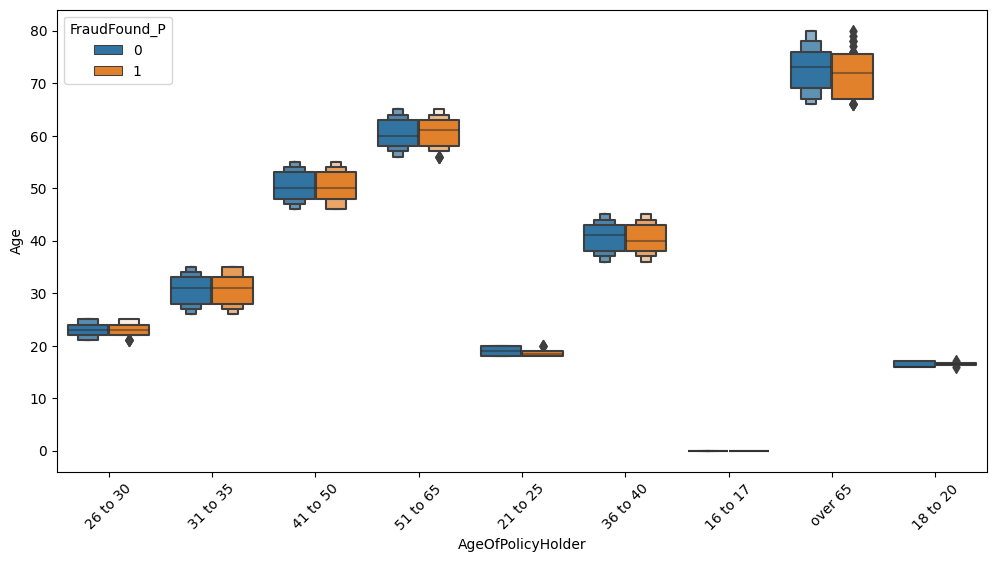

In [58]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df, x="AgeOfPolicyHolder" , y="Age", hue="FraudFound_P")
plt.xticks(rotation=45)
plt.show()

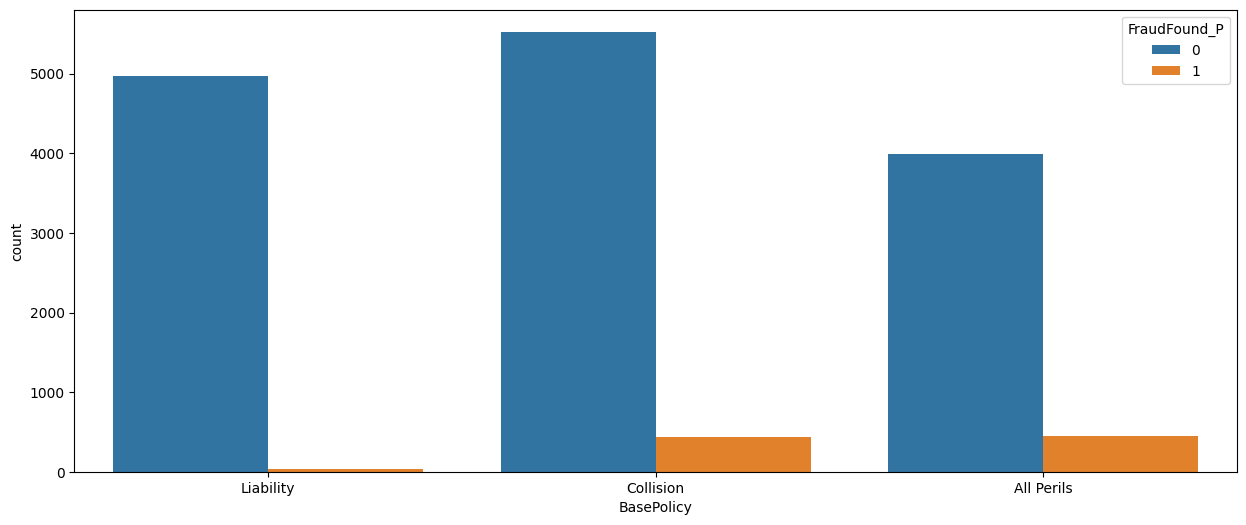

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="BasePolicy", hue="FraudFound_P")
plt.show()

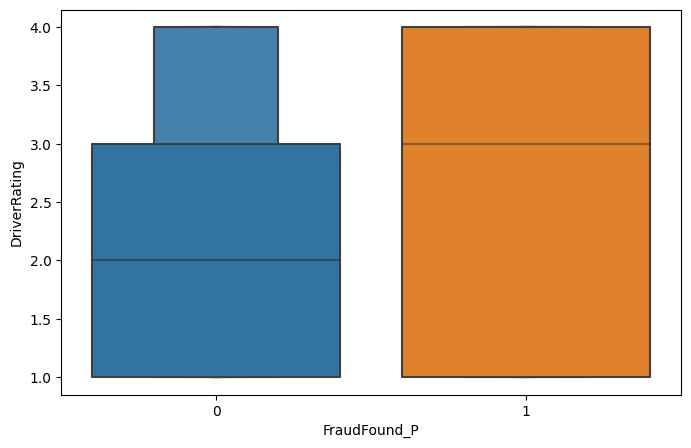

In [54]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x="FraudFound_P" , y="DriverRating")
plt.show()